# **Mount The GoogleDrive**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
dataset_path = "/content/drive/MyDrive/Cotton/archive.zip"

# **Extracting from the zipfile**

In [3]:
import zipfile

zip_path = "/content/drive/MyDrive/Cotton/archive.zip"

with zipfile.ZipFile(zip_path , 'r') as zip_ref :
  zip_ref.extractall("cotton_data")

# **Load the Required Libraries**

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers , models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , classification_report

# **Set Up Paths**

In [5]:
train_dir = "/content/cotton_data/Cotton Disease/train"
test_dir = "/content/cotton_data/Cotton Disease/test"
val_dir = "/content/cotton_data/Cotton Disease/val"

# **Define Image size and Batch size**

In [6]:
Image_size = (224,224)
Batch_size = 32

# **Create Image Data Generator**

In [7]:
datagen = ImageDataGenerator(rescale= 1./255)

# Load the train Images :
train_data = datagen.flow_from_directory('/content/cotton_data/Cotton Disease/train',
                                         target_size = Image_size,
                                         batch_size = Batch_size,
                                         class_mode = 'categorical'
)

# Load the Test Images :
test_data = datagen.flow_from_directory('/content/cotton_data/Cotton Disease/test',
                                         target_size = Image_size,
                                         batch_size = Batch_size,
                                         class_mode = 'categorical',
                                         shuffle = False
)


# Load the Val Images :
val_data = datagen.flow_from_directory('/content/cotton_data/Cotton Disease/val',
                                         target_size = Image_size,
                                         batch_size = Batch_size,
                                         class_mode = 'categorical',
)


Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


# **Load Pretrained MobileNetV2**

In [8]:
base_model = MobileNetV2(weights = 'imagenet',
                         include_top = False ,
                         input_shape = (224,224,3))

base_model.trainable = False

# add layers on the top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128,activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(train_data.num_classes,activation = 'softmax')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Compile and Training**

In [9]:
model.compile (
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(train_data , validation_data = val_data , epochs = 20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.6882 - loss: 0.8842 - val_accuracy: 0.9644 - val_loss: 0.1844
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9377 - loss: 0.2000 - val_accuracy: 0.9644 - val_loss: 0.1298
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9536 - loss: 0.1403 - val_accuracy: 0.9644 - val_loss: 0.1200
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9643 - loss: 0.1139 - val_accuracy: 0.9644 - val_loss: 0.1106
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9722 - loss: 0.0944 - val_accuracy: 0.9842 - val_loss: 0.0960
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.9774 - loss: 0.0736 - val_accuracy: 0.9881 - val_loss: 0.0901
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9768 - loss: 0.0656 - val_accuracy: 0.9605 - val_loss: 0.1118
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9825 - loss: 0.0520 - val_accuracy: 0.9802 - v

# **Evaluate**

In [10]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9430 - loss: 0.1048
Test Loss: 0.1154
Test Accuracy: 0.9434


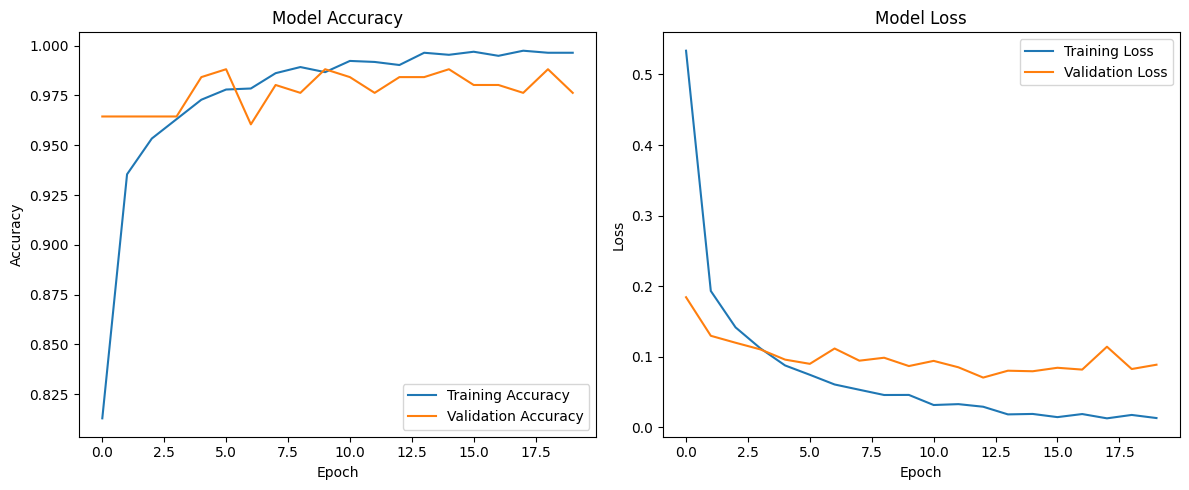

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

- Model is learning well and generalizing well.There is no over or underfitting so we can take it as healthy training

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


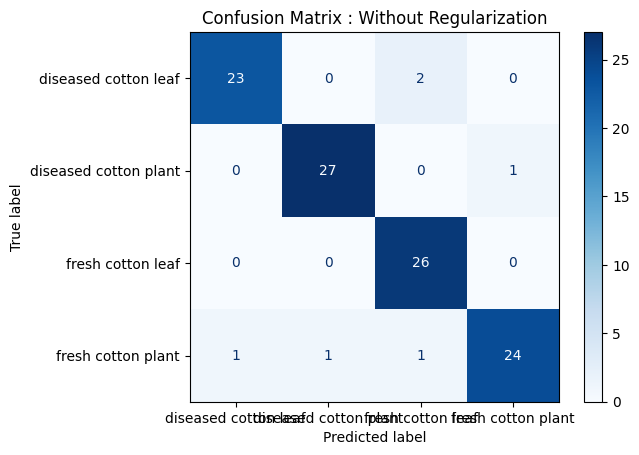

In [12]:
pred_probabs_base = model.predict(test_data)
pred_classes_base = np.argmax(pred_probabs_base , axis = 1)

# True claass labesl
true_clss_base = test_data.classes
clss_names_base = list(test_data.class_indices.keys())


# Confusion Matrix:
cm_base = confusion_matrix(true_clss_base ,
                      pred_classes_base)

displ_base = ConfusionMatrixDisplay(confusion_matrix = cm_base,
                               display_labels = clss_names_base)
displ_base.plot(cmap='Blues')
plt.title("Confusion Matrix : Without Regularization")
plt.show()

In [13]:
print(classification_report(true_clss_base , pred_classes_base , target_names= clss_names_base))

                       precision    recall  f1-score   support

 diseased cotton leaf       0.96      0.92      0.94        25
diseased cotton plant       0.96      0.96      0.96        28
    fresh cotton leaf       0.90      1.00      0.95        26
   fresh cotton plant       0.96      0.89      0.92        27

             accuracy                           0.94       106
            macro avg       0.94      0.94      0.94       106
         weighted avg       0.95      0.94      0.94       106



# **Experiment with Regularization**

In [14]:
base_model_im = MobileNetV2(
    weights = 'imagenet',
    include_top = False ,
    input_shape = (224,224,3))

base_model_im.trainable = False

# add layers on the top
model_im = models.Sequential([
    base_model_im,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128,activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes,activation = 'softmax')
])

In [15]:
# Applying Early Stopping
early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True
)

In [16]:
model_im.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [17]:
history_im = model_im.fit(
    train_data,
    validation_data = val_data,
    epochs = 20,
    callbacks = [early_stop]
)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.6972 - loss: 0.7391 - val_accuracy: 0.9209 - val_loss: 0.2288
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9102 - loss: 0.2502 - val_accuracy: 0.9605 - val_loss: 0.1478
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.9284 - loss: 0.1817 - val_accuracy: 0.9644 - val_loss: 0.1371
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9510 - loss: 0.1505 - val_accuracy: 0.9723 - val_loss: 0.1118
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9531 - loss: 0.1444 - val_accuracy: 0.9723 - val_loss: 0.1027
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9615 - loss: 0.1108 - val_accuracy: 0.9723 - val_loss: 0.1011
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9671 - loss: 0.0953 - val_accuracy: 0.9605 - val_loss: 0.0967
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9776 - loss: 0.0782 - val_accuracy: 0.9605 - v

# **Evaluation on Test Data**

In [18]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9430 - loss: 0.1048
Test Loss: 0.1154
Test Accuracy: 0.9434


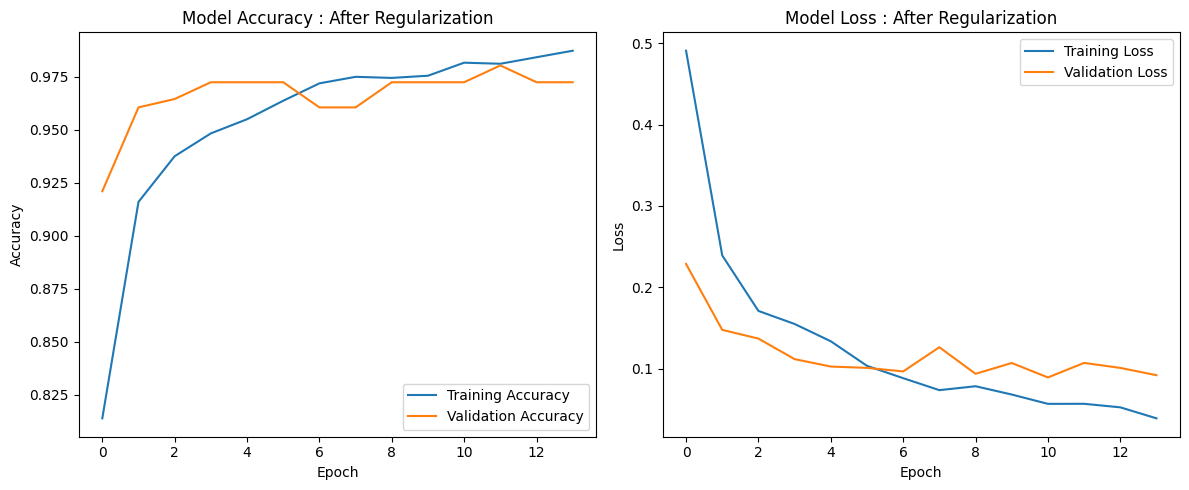

In [19]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_im.history['accuracy'], label='Training Accuracy')
plt.plot(history_im.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy : After Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_im.history['loss'], label='Training Loss')
plt.plot(history_im.history['val_loss'], label='Validation Loss')
plt.title('Model Loss : After Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

- After applying regularization  , i noticed that my model performance is declined.
- It indicates underfitting as training accuracy dropped and both loss curves becomes unstable .


# **Predict on Test data**

In [ ]:
pred_probabs = model_im.predict(test_data)
pred_classes = np.argmax(pred_probabs , axis = 1)

# True claass labesl
true_clss = test_data.classes
clss_names = list(test_data.class_indices.keys())


# Confusion Matrix:
cm = confusion_matrix(true_clss ,
                      pred_classes)

displ = ConfusionMatrixDisplay(confusion_matrix = cm,
                               display_labels = clss_names)
displ.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [21]:
print(classification_report(true_clss , pred_classes , target_names= clss_names))

                       precision    recall  f1-score   support

 diseased cotton leaf       0.96      1.00      0.98        25
diseased cotton plant       1.00      1.00      1.00        28
    fresh cotton leaf       0.96      1.00      0.98        26
   fresh cotton plant       1.00      0.93      0.96        27

             accuracy                           0.98       106
            macro avg       0.98      0.98      0.98       106
         weighted avg       0.98      0.98      0.98       106



# **Saving the Baseline Model**

In [ ]:
model.save("cotten_disease_model.h5")

In [23]:
from google.colab import files
files.download("cotten_disease_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# Saving the classification report
report = classification_report(true_clss_base , pred_classes_base , target_names= clss_names_base)

with open("classification_report.txt" , 'w') as f:
  f.write(report)

In [25]:
cm_base = confusion_matrix(true_clss_base ,
                      pred_classes_base)

displ_base = ConfusionMatrixDisplay(confusion_matrix = cm_base,
                               display_labels = clss_names_base)
displ_base.plot(cmap='Blues')
plt.title("Confusion Matrix : Without Regularization")
plt.savefig("confusion_matrix.png")
plt.close()